# Training RockGAN for 3D porous media generation

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm
from rockgan.architecture import *
from rockgan.utils import *

## Uploading real dataset

In [3]:
# Uploading 1024 samples extracted from the original sample
DATASET = torch.from_numpy(np.load('../data/Berea_subpatches.npy'))
print(DATASET.shape)

torch.Size([1024, 128, 128, 128])


Showing a 2D slide of one sample corresponding to the training dataset. 

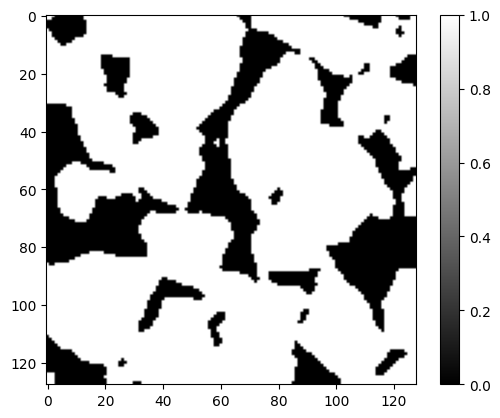

In [4]:
plt.imshow(DATASET[0,0,:,:], cmap='gray')
plt.colorbar()

### Specify GPU location

In [5]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

DEVICE = torch.device('cuda')

## Hyper-parameters selection

In [6]:
#Specifiying folder location to save models per epoch
CHECKPOINT_GEN = "../checkpoints/generator/"
CHECKPOINT_CRITIC = "../checkpoints/critic/"

# Training hyperparameters
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
Z_DIM = 16
NUM_EPOCHS = 101
CRITIC_ITERATIONS = 4
LAMBDA_GP = 25

In [7]:
# initialize data loader
loader = DataLoader(MyLoader(DATASET), batch_size=BATCH_SIZE, shuffle=True, num_workers=8)

## Starting Training (Showing 2D silices while training)

100%|█| 32/32 [04:49<00:00,  9.04s/it, critic_loss=0.903, epoch=0, gen_loss=0.06


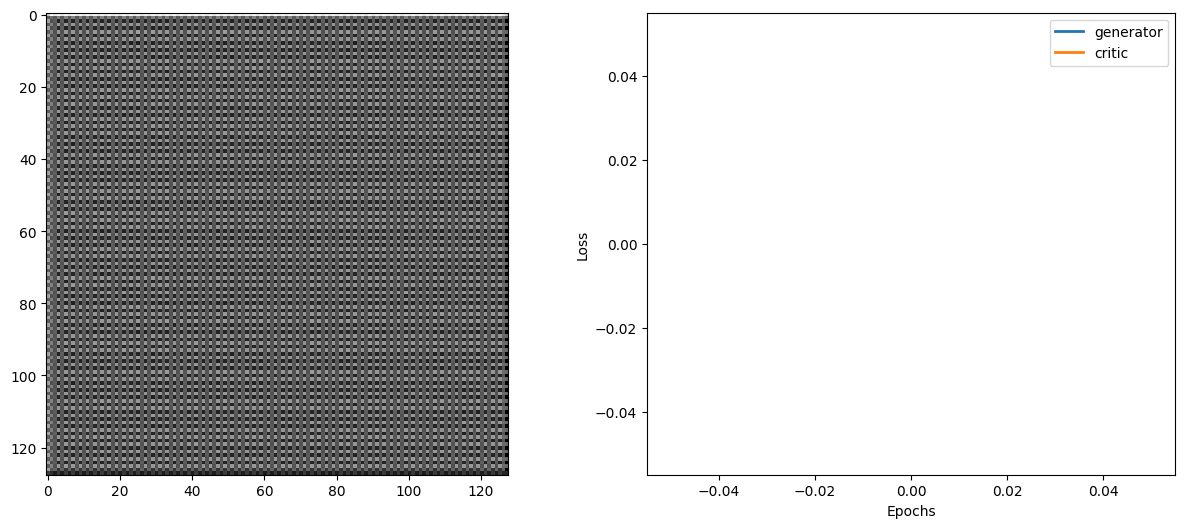

100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=0.241, epoch=1, gen_loss=0.14
100%|█| 32/32 [04:47<00:00,  8.98s/it, critic_loss=-.0768, epoch=2, gen_loss=0.5
100%|█| 32/32 [04:47<00:00,  8.97s/it, critic_loss=-1.27, epoch=3, gen_loss=1.26
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-4.35, epoch=4, gen_loss=2.45
100%|█| 32/32 [04:47<00:00,  8.98s/it, critic_loss=-6.78, epoch=5, gen_loss=3.72
100%|██| 32/32 [04:49<00:00,  9.03s/it, critic_loss=-11, epoch=7, gen_loss=6.01]
100%|█| 32/32 [04:49<00:00,  9.05s/it, critic_loss=-12.6, epoch=8, gen_loss=6.72
100%|█| 32/32 [04:48<00:00,  9.02s/it, critic_loss=-13.5, epoch=9, gen_loss=7.12
100%|█| 32/32 [04:49<00:00,  9.04s/it, critic_loss=-14, epoch=10, gen_loss=7.33]


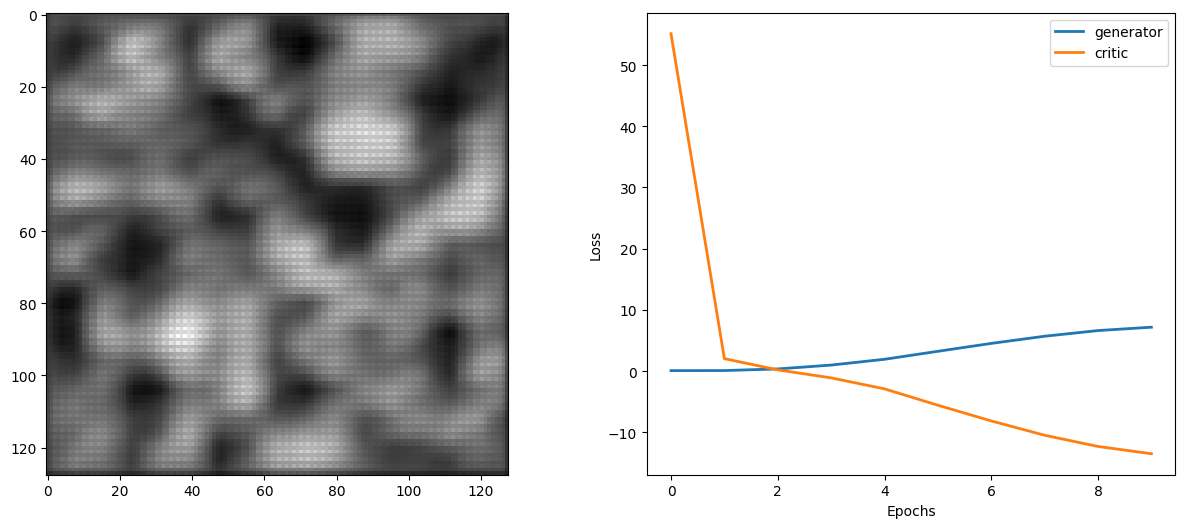

100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-14, epoch=11, gen_loss=7.34]
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-14.1, epoch=12, gen_loss=7.3
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-14.1, epoch=13, gen_loss=7.4
100%|█| 32/32 [04:47<00:00,  8.98s/it, critic_loss=-14.4, epoch=14, gen_loss=7.5
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-15.1, epoch=15, gen_loss=7.9
100%|█| 32/32 [04:47<00:00,  8.97s/it, critic_loss=-16.3, epoch=16, gen_loss=8.5
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-18.2, epoch=17, gen_loss=9.5
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-20.5, epoch=18, gen_loss=10.
100%|█| 32/32 [04:47<00:00,  8.98s/it, critic_loss=-23.4, epoch=19, gen_loss=12.
100%|█| 32/32 [04:47<00:00,  8.97s/it, critic_loss=-24.4, epoch=20, gen_loss=14.


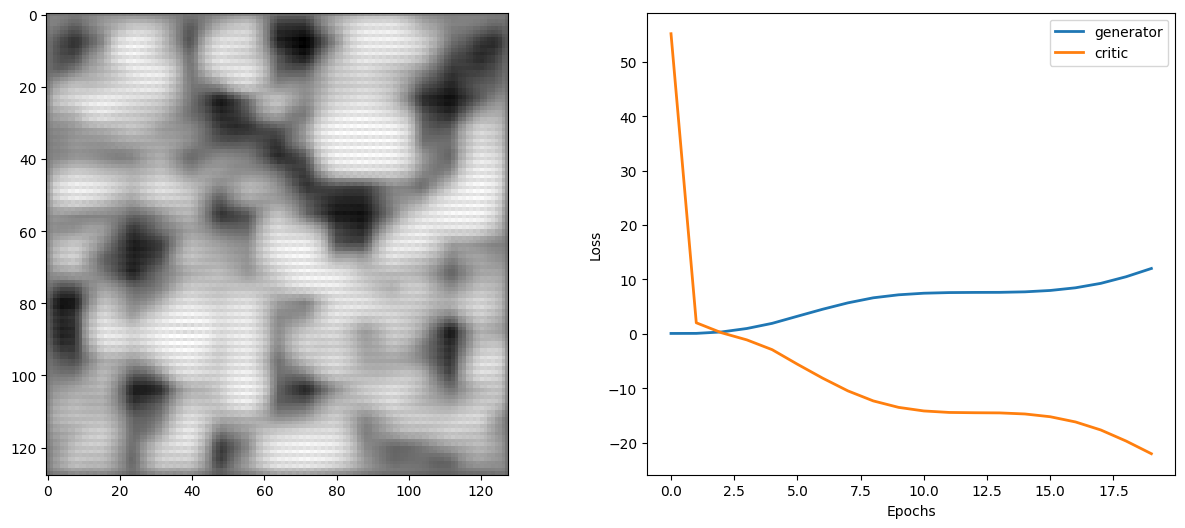

100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-25.9, epoch=21, gen_loss=12.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-22.1, epoch=22, gen_loss=11.
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-19.1, epoch=23, gen_loss=15.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-20.3, epoch=24, gen_loss=15.
100%|█| 32/32 [04:48<00:00,  9.02s/it, critic_loss=-20.3, epoch=25, gen_loss=10.
100%|█| 32/32 [04:47<00:00,  8.99s/it, critic_loss=-22.3, epoch=26, gen_loss=17.
100%|█| 32/32 [04:47<00:00,  8.97s/it, critic_loss=-13.5, epoch=27, gen_loss=18.
100%|█| 32/32 [04:47<00:00,  8.98s/it, critic_loss=-11.3, epoch=28, gen_loss=15.
100%|█| 32/32 [04:47<00:00,  8.97s/it, critic_loss=-24.2, epoch=29, gen_loss=12.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-19.6, epoch=30, gen_loss=18.


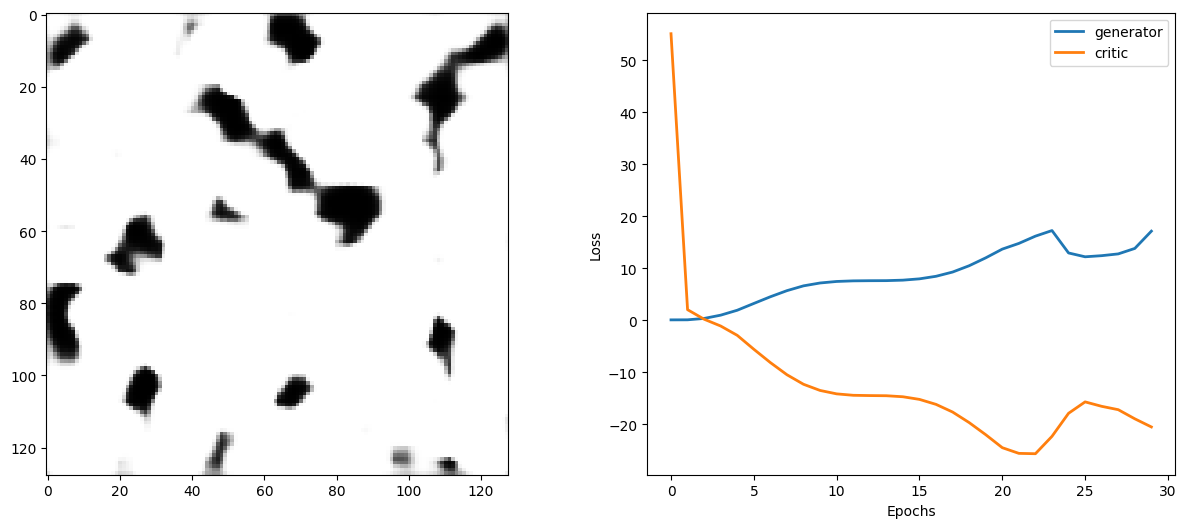

100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=0.251, epoch=31, gen_loss=6.6
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-19.3, epoch=32, gen_loss=10.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-24.2, epoch=33, gen_loss=19.
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-24, epoch=34, gen_loss=16.4]
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-30.9, epoch=35, gen_loss=21.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-31.2, epoch=36, gen_loss=20.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-27.7, epoch=37, gen_loss=20.
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-29.7, epoch=38, gen_loss=19.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-29.3, epoch=39, gen_loss=19.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-32.5, epoch=40, gen_loss=21.


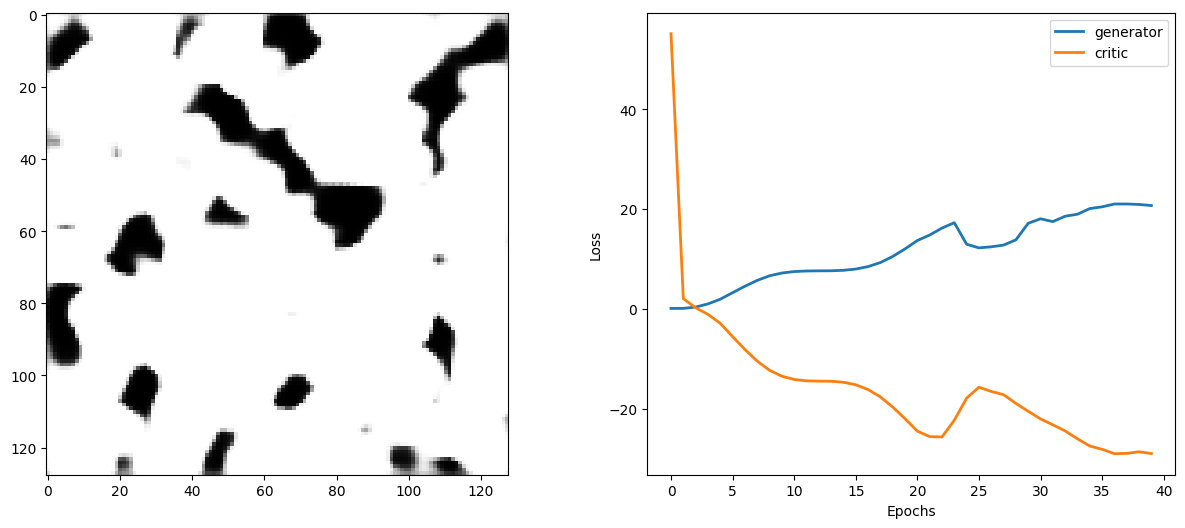

100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-28.6, epoch=41, gen_loss=22.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-27.8, epoch=42, gen_loss=22.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-27, epoch=43, gen_loss=17.2]
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-22.2, epoch=44, gen_loss=15.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-26.9, epoch=45, gen_loss=11.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-23.9, epoch=46, gen_loss=19.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-14.4, epoch=47, gen_loss=10.
100%|█| 32/32 [04:46<00:00,  8.94s/it, critic_loss=-16.8, epoch=48, gen_loss=24]
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-21.7, epoch=49, gen_loss=20.
100%|█| 32/32 [04:45<00:00,  8.94s/it, critic_loss=-21.5, epoch=50, gen_loss=23.


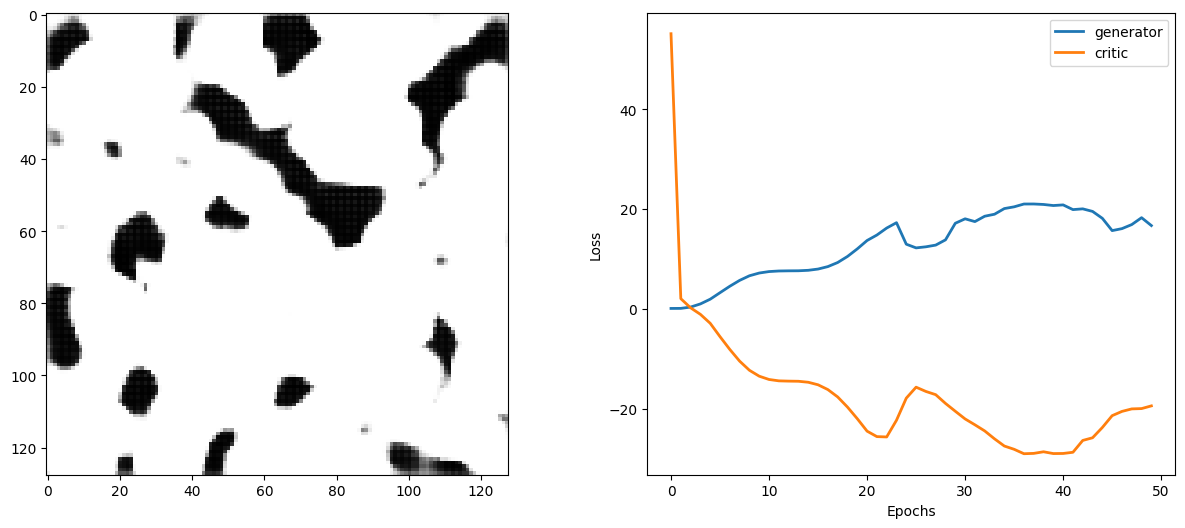

100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-10.8, epoch=51, gen_loss=11.
100%|███| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-22, epoch=52, gen_loss=16]
100%|█| 32/32 [04:46<00:00,  8.94s/it, critic_loss=-24.1, epoch=53, gen_loss=19.
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-21.5, epoch=54, gen_loss=16.
100%|█| 32/32 [04:46<00:00,  8.94s/it, critic_loss=-21, epoch=55, gen_loss=16.7]
100%|█| 32/32 [04:47<00:00,  8.97s/it, critic_loss=-18.3, epoch=56, gen_loss=12.
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-15.3, epoch=57, gen_loss=11.
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-27.3, epoch=58, gen_loss=15.
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-25.4, epoch=59, gen_loss=17.
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-25.5, epoch=60, gen_loss=18]


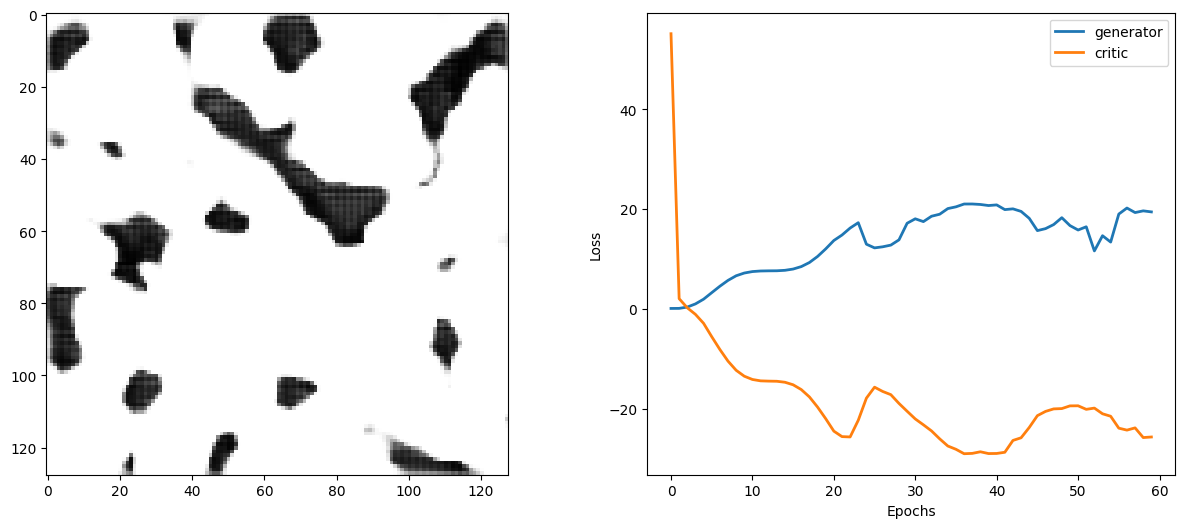

100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-29.1, epoch=61, gen_loss=19.
100%|█| 32/32 [04:47<00:00,  8.98s/it, critic_loss=-22.1, epoch=62, gen_loss=19.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-25.9, epoch=63, gen_loss=20.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-23.2, epoch=64, gen_loss=18.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-25.7, epoch=65, gen_loss=22]
100%|█| 32/32 [04:47<00:00,  8.99s/it, critic_loss=-23.6, epoch=66, gen_loss=15.
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-22.2, epoch=68, gen_loss=19]
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-23.4, epoch=69, gen_loss=17.
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-22.6, epoch=70, gen_loss=-1.


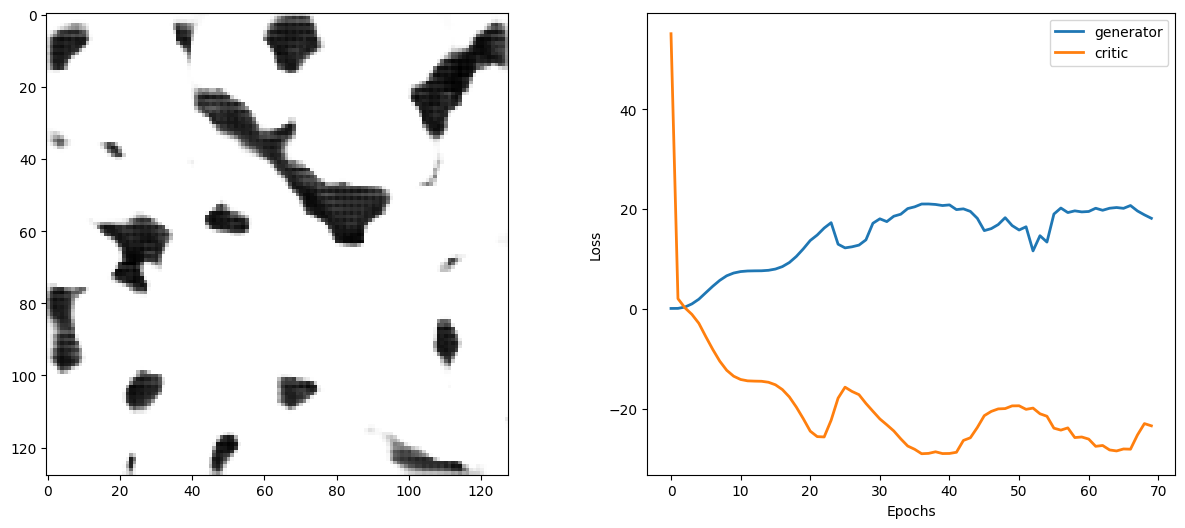

100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-15.3, epoch=71, gen_loss=15.
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-15.1, epoch=72, gen_loss=7.8
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-19.9, epoch=73, gen_loss=22.
100%|█| 32/32 [04:46<00:00,  8.94s/it, critic_loss=-8.25, epoch=74, gen_loss=-4.
100%|█| 32/32 [04:45<00:00,  8.91s/it, critic_loss=-16.6, epoch=75, gen_loss=11.
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-15.7, epoch=76, gen_loss=11]
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-17.5, epoch=77, gen_loss=11.
100%|███| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-21, epoch=78, gen_loss=15]
100%|█| 32/32 [04:46<00:00,  8.94s/it, critic_loss=-18.6, epoch=79, gen_loss=12.
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-22.4, epoch=80, gen_loss=10]


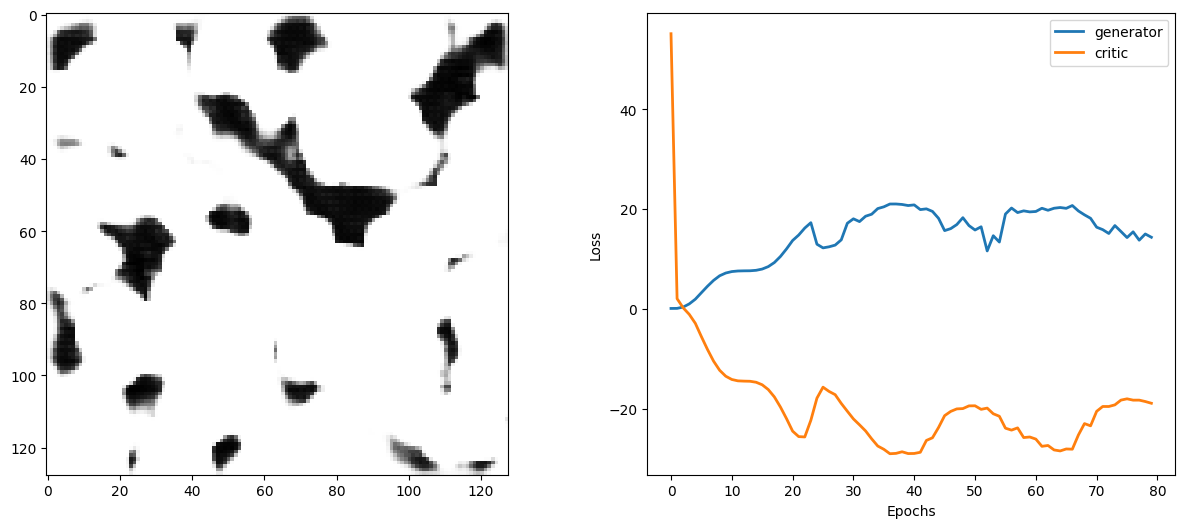

100%|█| 32/32 [04:47<00:00,  8.97s/it, critic_loss=-20.5, epoch=81, gen_loss=15.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-23.2, epoch=82, gen_loss=6.8
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-17.6, epoch=83, gen_loss=16.
100%|█| 32/32 [04:47<00:00,  8.98s/it, critic_loss=-26.2, epoch=84, gen_loss=19.
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-25.2, epoch=85, gen_loss=18.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-20.8, epoch=86, gen_loss=17.
100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-18.2, epoch=87, gen_loss=17.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-24.1, epoch=88, gen_loss=17.
100%|█| 32/32 [04:44<00:00,  8.90s/it, critic_loss=-15.6, epoch=89, gen_loss=16.
100%|█| 32/32 [04:46<00:00,  8.96s/it, critic_loss=-24.1, epoch=90, gen_loss=17.


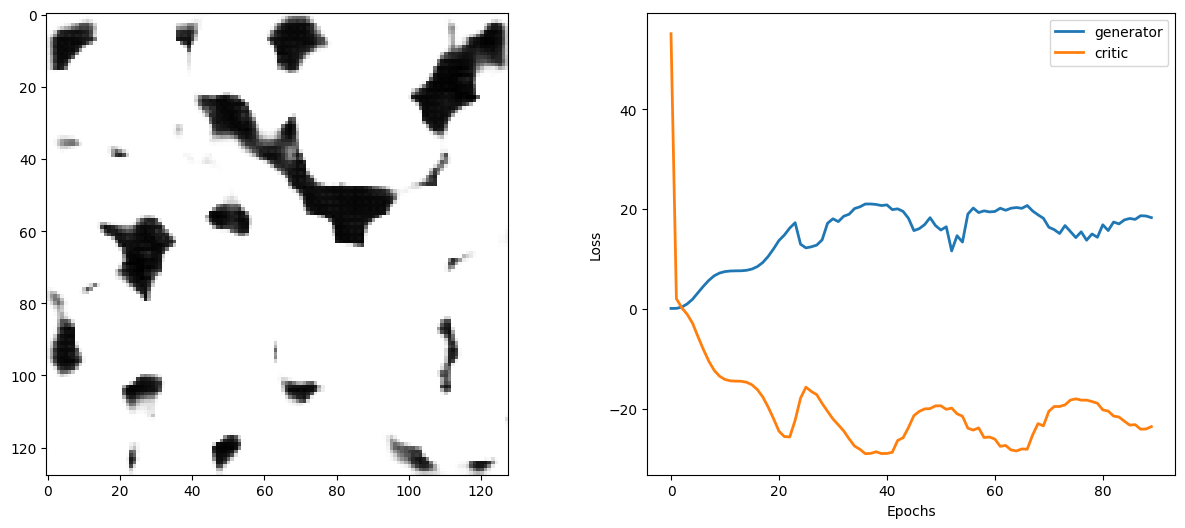

100%|█| 32/32 [04:46<00:00,  8.97s/it, critic_loss=-23.3, epoch=91, gen_loss=16.
100%|█| 32/32 [04:46<00:00,  8.95s/it, critic_loss=-23.6, epoch=92, gen_loss=23.
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-22.1, epoch=93, gen_loss=13.
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-19.6, epoch=94, gen_loss=23.
100%|█| 32/32 [04:45<00:00,  8.94s/it, critic_loss=-20.8, epoch=95, gen_loss=18.
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-11.5, epoch=96, gen_loss=13]
100%|█| 32/32 [04:45<00:00,  8.93s/it, critic_loss=-21.1, epoch=97, gen_loss=1.0
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-18.2, epoch=98, gen_loss=16.
100%|█| 32/32 [04:45<00:00,  8.91s/it, critic_loss=-17, epoch=99, gen_loss=14.2]
100%|█| 32/32 [04:45<00:00,  8.92s/it, critic_loss=-17.9, epoch=100, gen_loss=8.


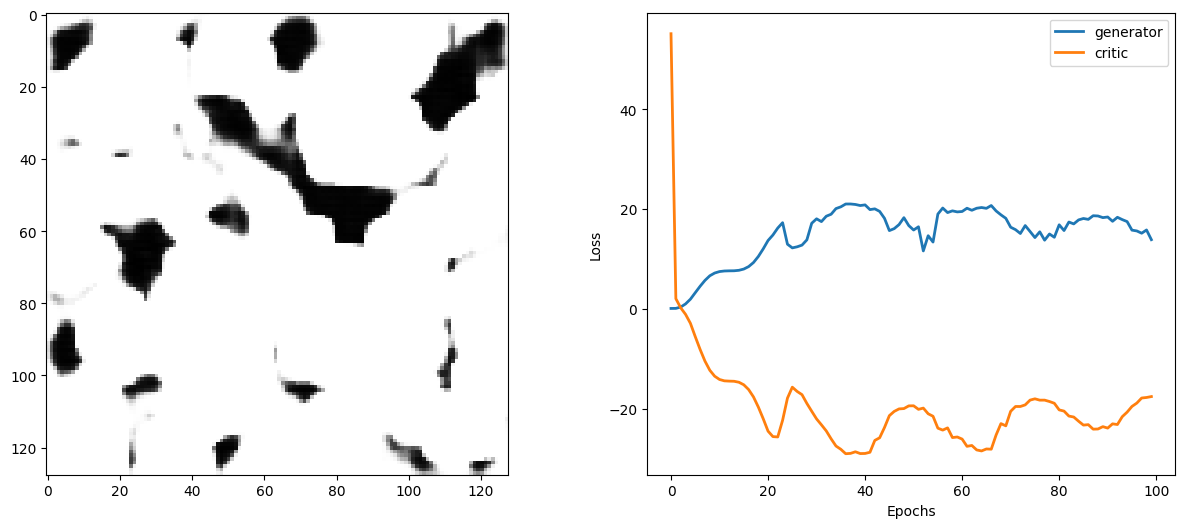

In [8]:
seed_everything(seed=11)

# initialize generator and critic
gen = Generator(in_channel=1, out_channel=1).to(DEVICE)
gen.train()

critic = Discriminator(in_channel=1, out_channel=1).to(DEVICE)
critic.train()

# initialize optimizerstride
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.9))
scheduler_gen = optim.lr_scheduler.CosineAnnealingLR(opt_gen, 4 * NUM_EPOCHS)

opt_critic = optim.Adam(critic.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.9))
scheduler_critic = optim.lr_scheduler.CosineAnnealingLR(opt_critic, 4 * NUM_EPOCHS * CRITIC_ITERATIONS)

# fixed noise for display
fixed_noise = torch.randn(BATCH_SIZE,1, Z_DIM, Z_DIM, Z_DIM).to(DEVICE)

# Criterion for measuring porosity difference
criterion = torch.nn.MSELoss()

# Training
losses_gen = []
losses_critic = []

for epoch in range(NUM_EPOCHS):
    batches = tqdm(loader)
    mean_loss_gen = 0
    mean_loss_critic = 0
    for batch_idx, real in enumerate(batches):
        real = real.float().unsqueeze(1).to(DEVICE)
        cur_batch_size = real.shape[0]

        # Train Critic: max E[critic(real)] - E[critic(fake)]
        # equivalent to minimizing the negative of that
        for _ in range(CRITIC_ITERATIONS):
            noise = torch.randn(cur_batch_size,1, Z_DIM, Z_DIM, Z_DIM).to(DEVICE)
            fake = gen(noise)

            critic_real = critic(real).reshape(-1)
            critic_fake = critic(fake).reshape(-1)
            
            gp = gradient_penalty(critic, real, fake, device=DEVICE)
            loss_critic = (
                -(torch.mean(critic_real) - torch.mean(critic_fake)) 
                + LAMBDA_GP * gp
            )
            critic.zero_grad()
            loss_critic.backward(retain_graph=True)
            opt_critic.step()
            scheduler_critic.step()

            # mean critic loss
            mean_loss_critic += loss_critic.item()

        # Train Generator: max E[critic(gen_fake)] <-> min -E[critic(gen_fake)]
        gen_fake = critic(fake).reshape(-1)
        loss_gen = -torch.mean(gen_fake)
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()
        scheduler_gen.step()

        # mean generator loss
        mean_loss_gen += loss_gen.item()

        batches.set_postfix(
            epoch=epoch,
            gen_loss=loss_gen.item(),
            critic_loss=loss_critic.item(),
        )
    #Show a example of the samples generated and the losses     
    if epoch % 10 == 0:
        fig, ax = plt.subplots(1,2, figsize=(15,6))
        #Samples
        ax[0].imshow(gen(fixed_noise)[0,0,0,:,:].detach().cpu().numpy(), cmap='gray')
        #Losses (generator and critic)
        ax[1].plot(losses_gen, label='generator', linewidth=2)
        ax[1].plot(losses_critic, label='critic', linewidth=2)
        ax[1].legend()
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Loss')
        plt.show()

    # save losses at each epoch
    losses_gen.append(mean_loss_gen / batch_idx)
    losses_critic.append(mean_loss_critic / (batch_idx * CRITIC_ITERATIONS))
    
    # Save checkpoints
    #Uncomment the following to save checkpoints while training
#     if (epoch + 1) % 2 == 0:
#         save_checkpoint(gen, opt_gen, path=CHECKPOINT_GEN + f"generator_RockGAN_{epoch}.pt")
#         save_checkpoint(critic, opt_critic, path=CHECKPOINT_CRITIC + f"critic_RockGAN_{epoch}.pt")
